# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


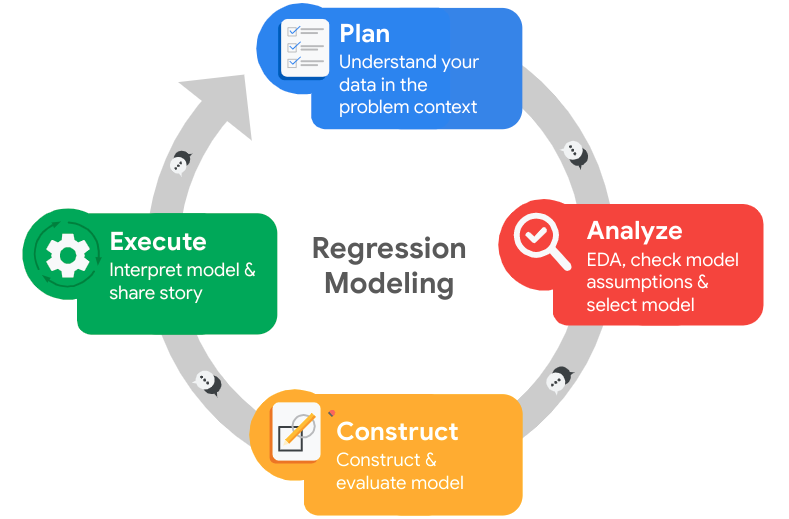

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sklearn metrics and functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving model
import pickle

# Display all columns in dataframes
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns to snake_case
df0.columns = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_monthly_hours', 'tenure', 'work_accident', 'left',
    'promotion_last_5years', 'department', 'salary'
]

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

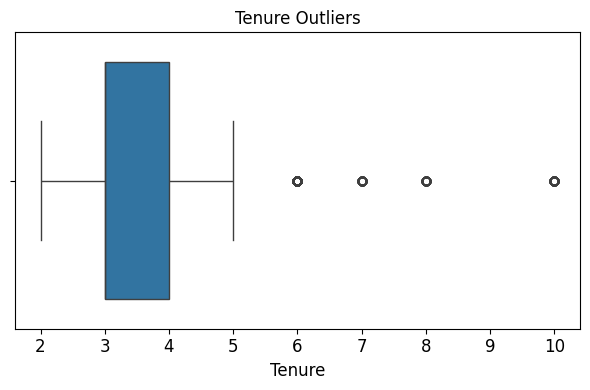

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 4))

sns.boxplot(data=df1, x='tenure')

plt.title('Tenure Outliers', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
# Determine the number of rows containing outliers

# 25th percentile value
q1 = df1['tenure'].quantile(0.25)

# 75th percentile value
q3 = df1['tenure'].quantile(0.75)

# interquartile range
iqr = q3 - q1

# upper limit and lower limit
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# subset of data containing outliers
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
print("Number of rows containing outliers in tenure:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
def update_legend(ax, label_map, title=''):
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [label_map.get(label, label) for label in labels]
    ax.legend(handles=handles, labels=new_labels, title=title)

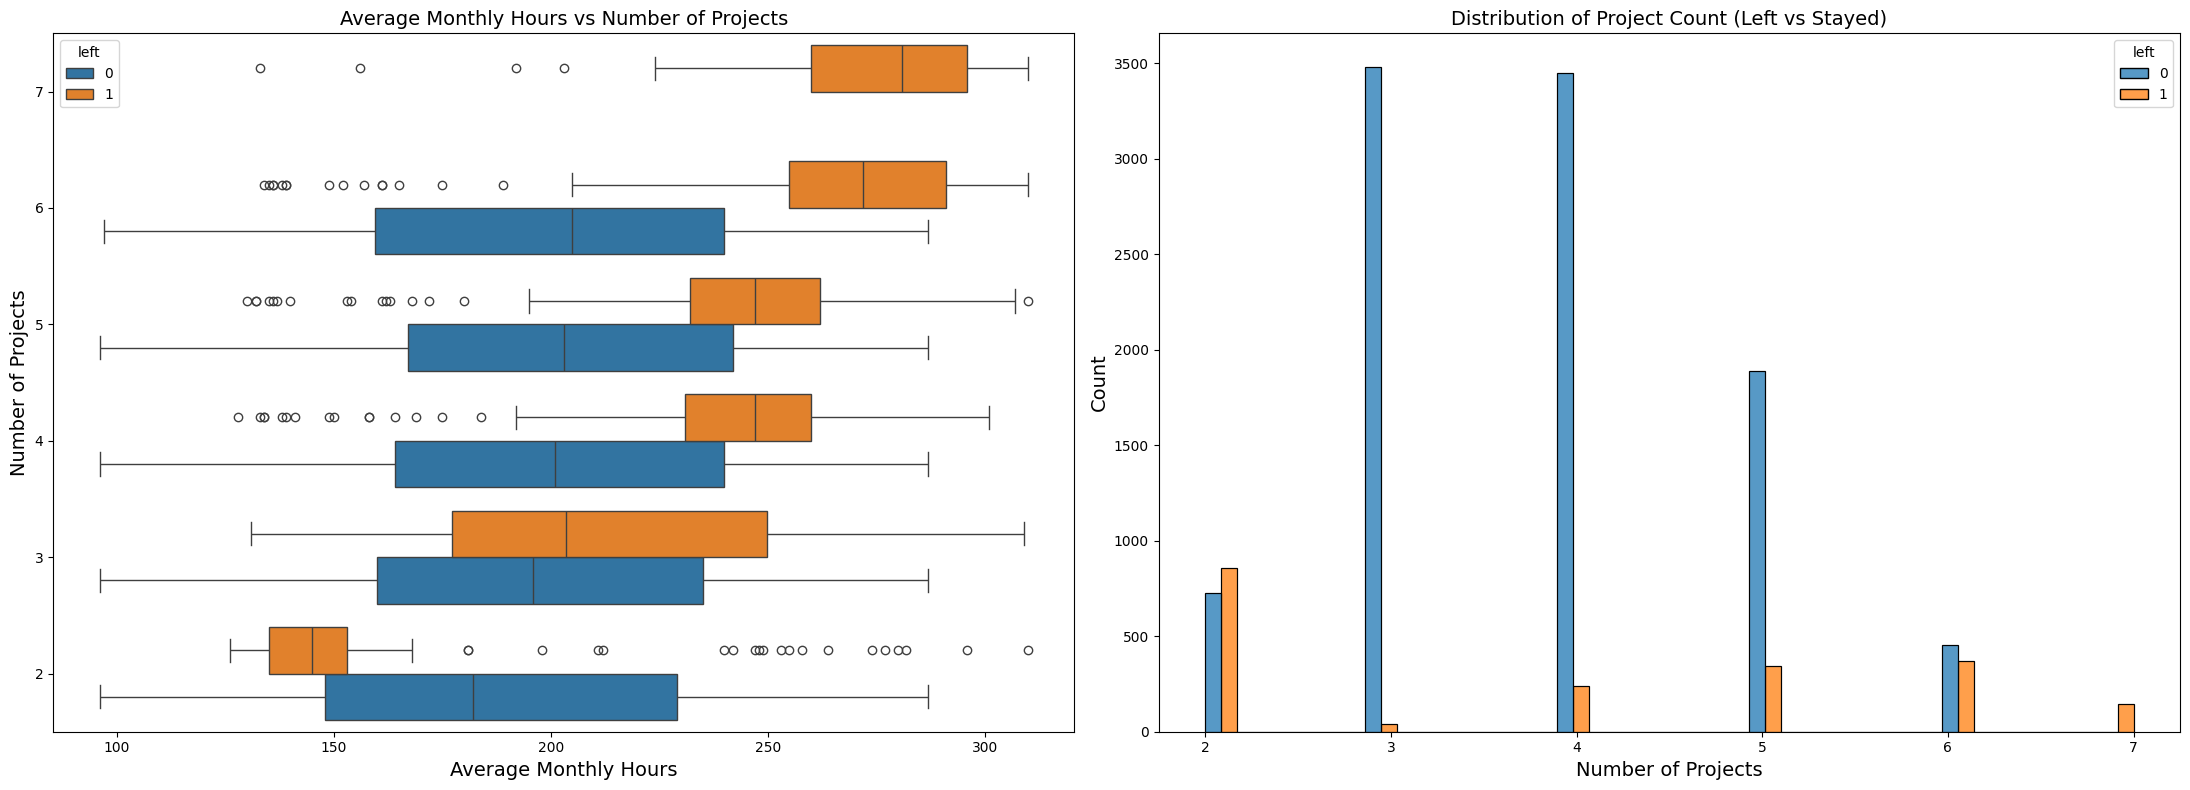

In [15]:
# Label map
label_map = {0: 'Stayed', 1: 'Left'}

# Setup subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Plot 1: Boxplot
sns.boxplot(data=df1,
            x='average_monthly_hours',
            y='number_project',
            hue='left',
            orient='h',
            ax=axes[0])

axes[0].invert_yaxis()

axes[0].set_title('Average Monthly Hours vs Number of Projects', fontsize='14')
axes[0].set_xlabel('Average Monthly Hours', fontsize='14')
axes[0].set_ylabel('Number of Projects', fontsize='14')

# Plot 2: Histogram
sns.histplot(data=df1,
             x='number_project',
             hue='left',
             multiple='dodge',
             ax=axes[1])

axes[1].set_title('Distribution of Project Count (Left vs Stayed)', fontsize='14')
axes[1].set_xlabel('Number of Projects', fontsize='14')
axes[1].set_ylabel('Count', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

In [16]:
# Caculate average number of hours worked per month
hour_per_month = 50 * 40 / 12   # Assuming 2 week off per year with a 40 hours work week

print(f"{round(hour_per_month, 2)} hours per month")

166.67 hours per month


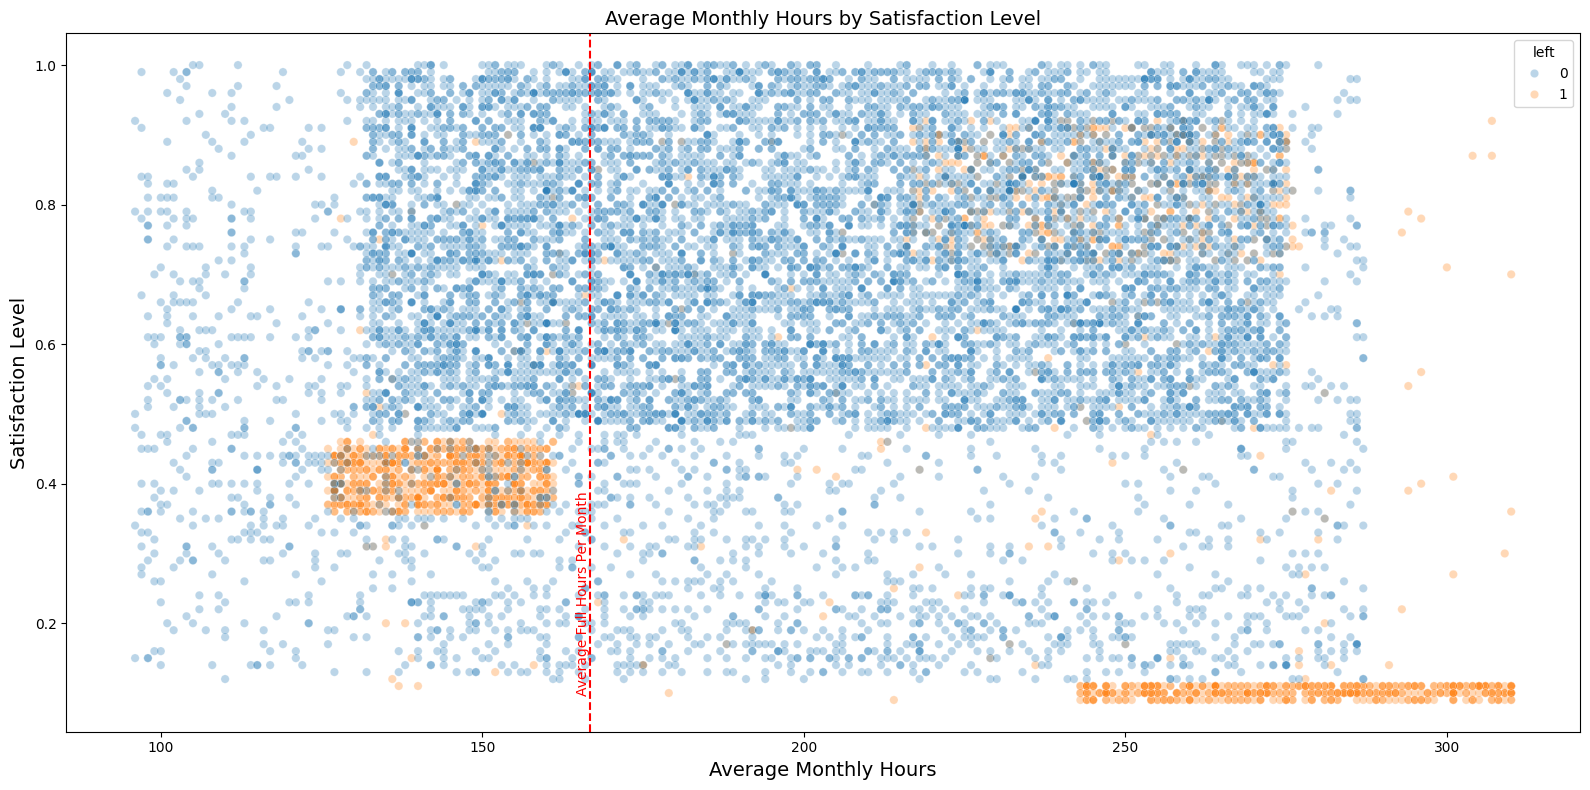

In [17]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='satisfaction_level',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.1, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Satisfaction Level', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Satisfaction Level', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

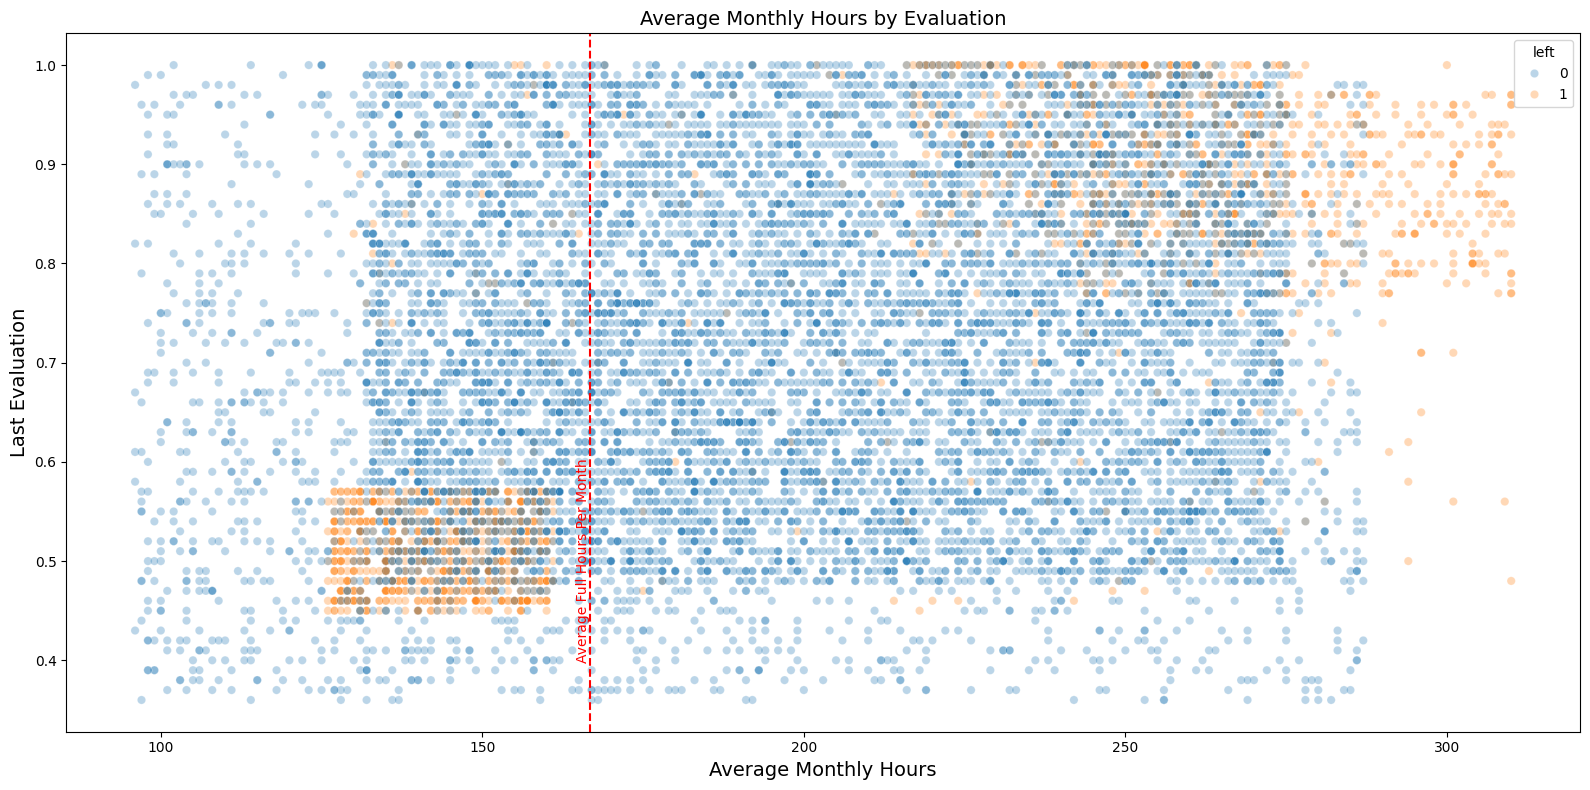

In [18]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='last_evaluation',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.4, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Evaluation', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Last Evaluation', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

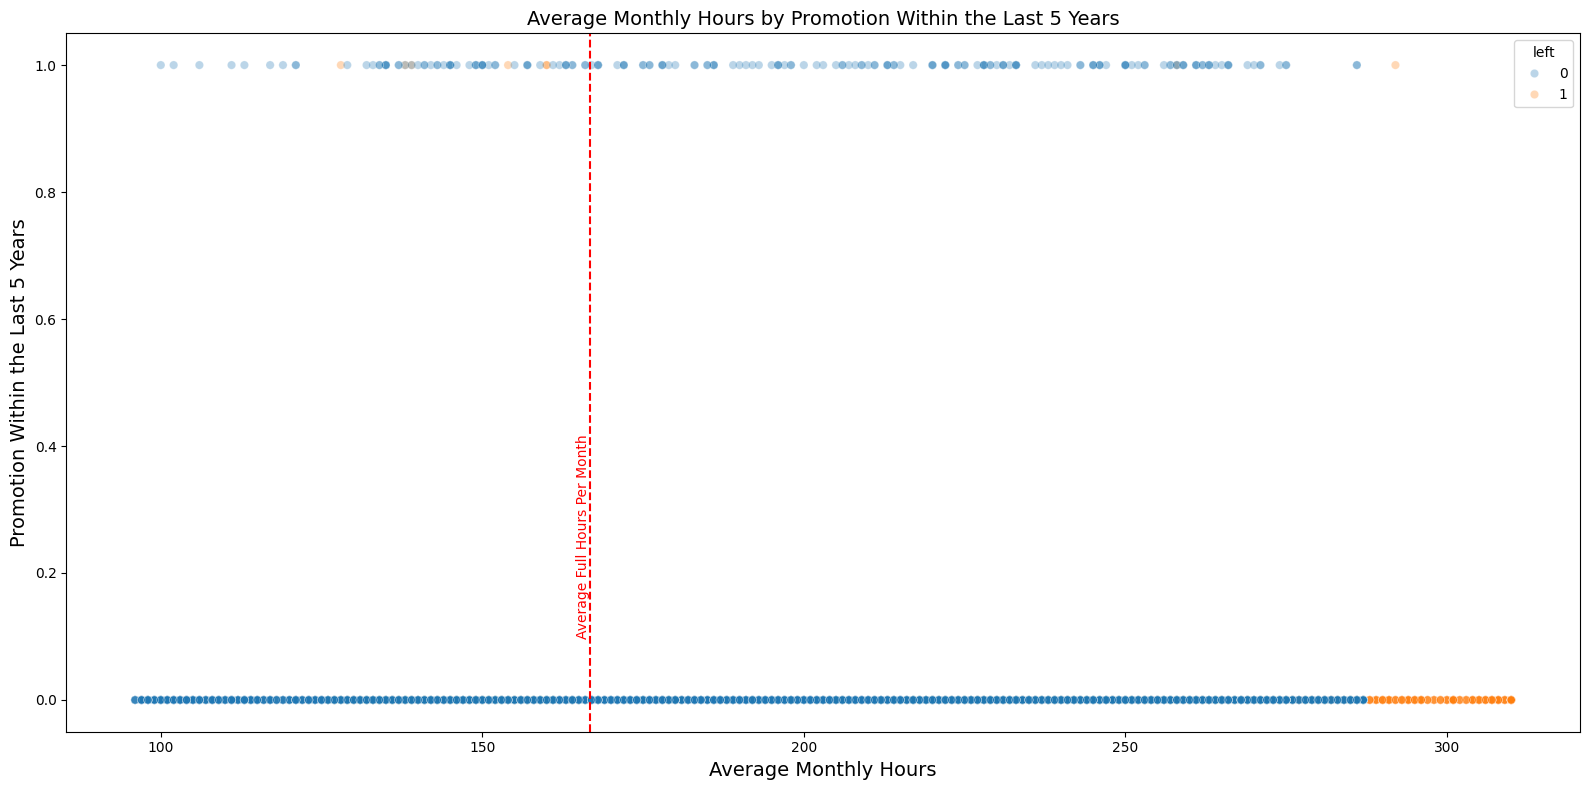

In [19]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='promotion_last_5years',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.1, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Promotion Within the Last 5 Years', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Promotion Within the Last 5 Years', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

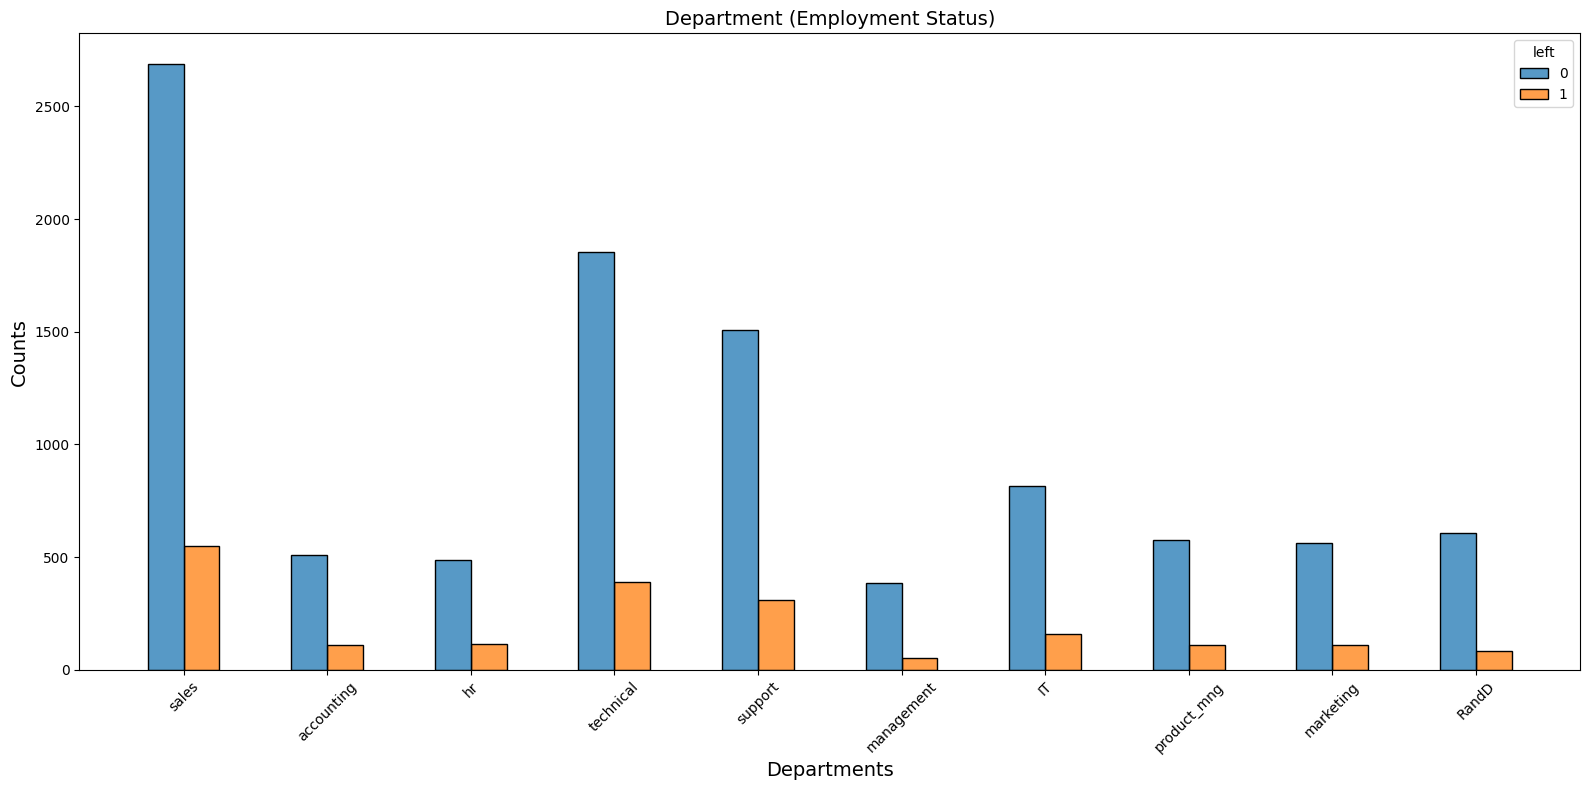

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df1,
             x='department',
             hue='left',
             discrete=1,
             shrink=0.5,
             multiple='dodge')

plt.title('Department (Employment Status)', fontsize='14')
plt.xlabel('Departments', fontsize='14')
plt.ylabel('Counts', fontsize='14')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

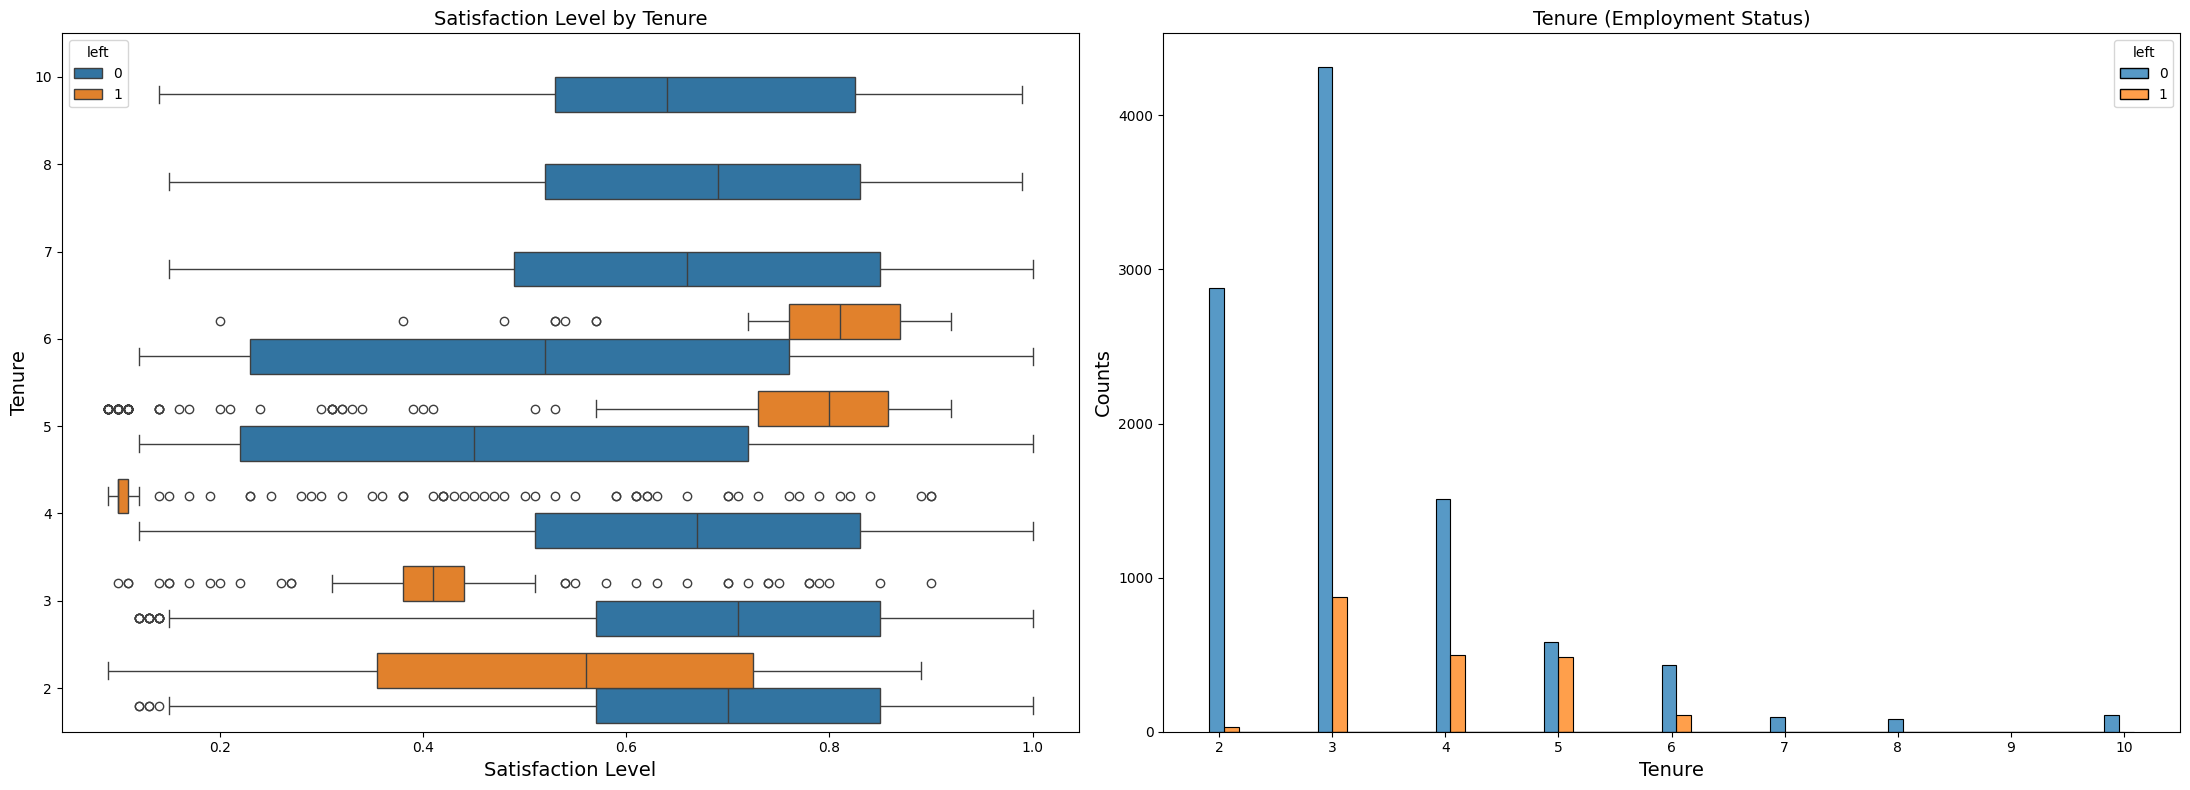

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df1,
            x='satisfaction_level',
            y='tenure',
            hue='left',
            orient='h',
            ax=axes[0])

axes[0].invert_yaxis()

axes[0].set_title('Satisfaction Level by Tenure', fontsize='14')
axes[0].set_xlabel('Satisfaction Level', fontsize='14')
axes[0].set_ylabel('Tenure', fontsize='14')

sns.histplot(data=df1,
             x='tenure',
             hue='left',
             multiple='dodge',
             shrink=3,
             ax=axes[1])

axes[1].set_title('Tenure (Employment Status)', fontsize='14')
axes[1].set_xlabel('Tenure', fontsize='14')
axes[1].set_ylabel('Counts', fontsize='14')

plt.tight_layout()
plt.show()

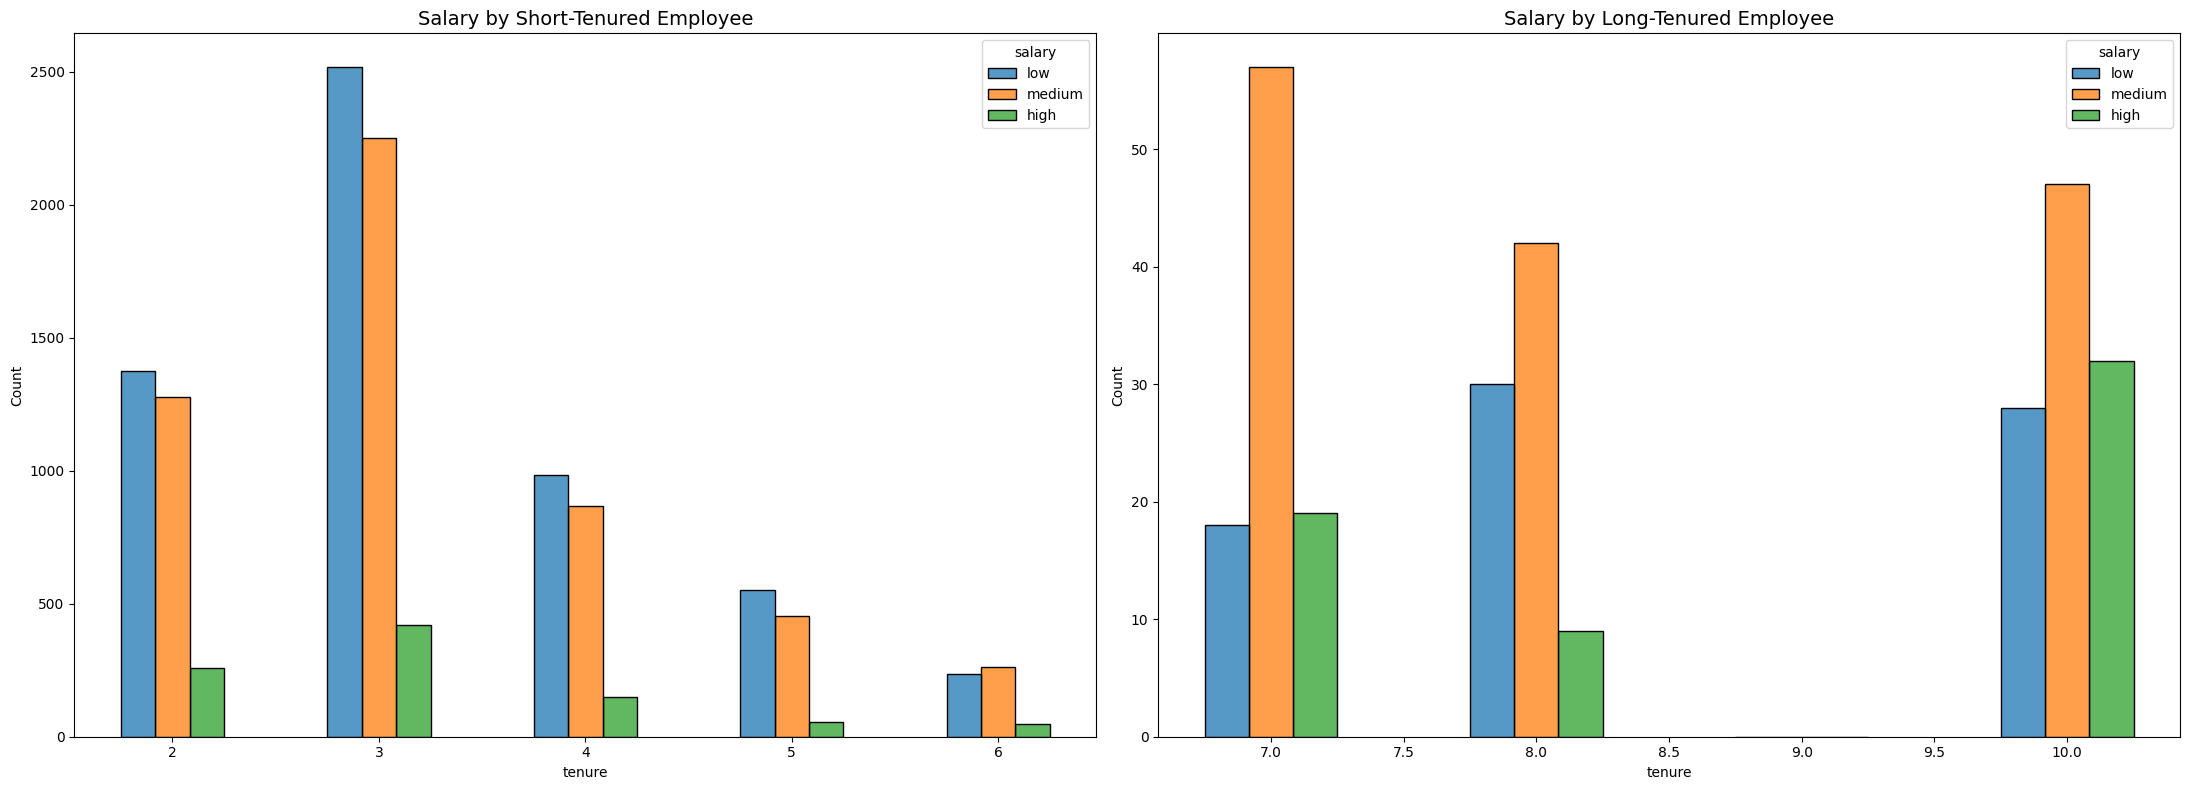

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]
hue_order=['low', 'medium', 'high']

sns.histplot(data=tenure_short,
            x='tenure',
            hue='salary',
            hue_order=hue_order,
            discrete=1,
            multiple='dodge',
            shrink=0.5,
            ax=axes[0])

axes[0].set_title('Salary by Short-Tenured Employee', fontsize='14')


sns.histplot(data=tenure_long,
             x='tenure',
             hue='salary',
             hue_order=hue_order,
             discrete=1,
             multiple='dodge',
             shrink=0.5,
             ax=axes[1])

axes[1].set_title('Salary by Long-Tenured Employee', fontsize='14')

plt.tight_layout()
plt.show()

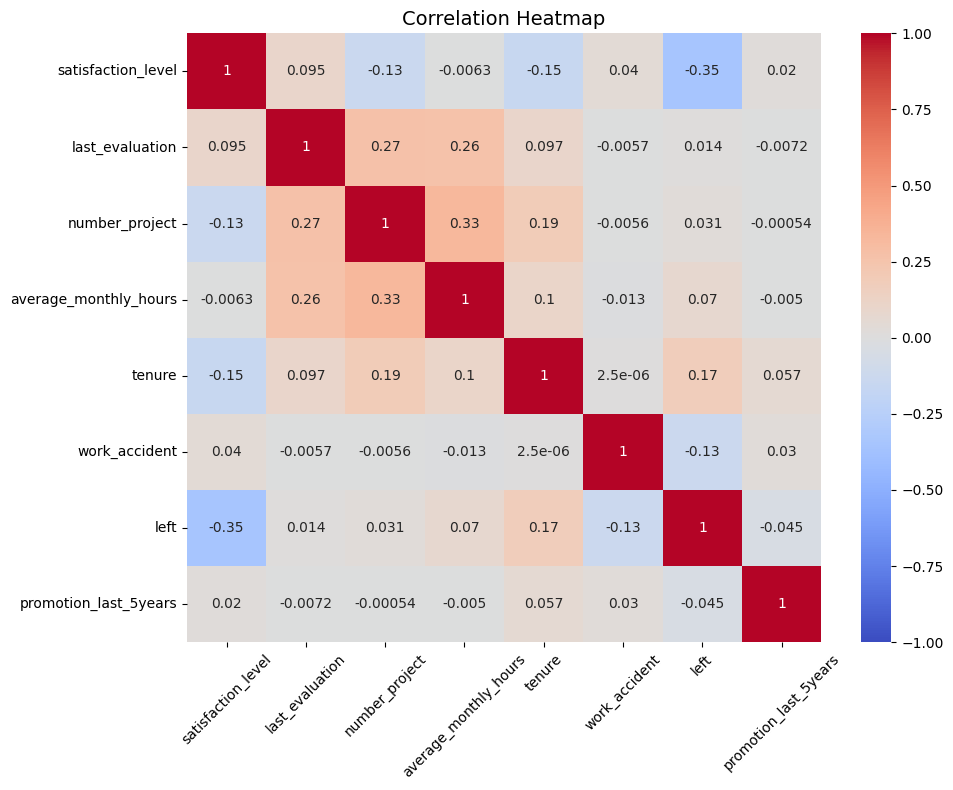

In [31]:
plt.figure(figsize=(10, 8))

correlation = df1.drop(['department', 'salary'], axis=1).corr()

sns.heatmap(correlation, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap=sns.color_palette("coolwarm", as_cmap=True))

plt.title('Correlation Heatmap', fontdict={'fontsize':14})

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee will leave the company. This is captured by the outcome variable left, where a value of 1 indicates the employee left, and 0 indicates they stayed.

### Identify the types of models most appropriate for this task.

A Logistic Regression model or a Tree-based Machine Learning Model is suitable to predict a categorical variable, such as whether or not an employee wants to leave the company. 

### Modeling

Add as many cells as you need to conduct the modeling process.

## Logistic Regression Model

In [25]:
# Encode categorical variables
df_encoded = df1.copy()
df_encoded['salary'] = df_encoded['salary'].astype('category').cat.codes

df_encoded = pd.get_dummies(df_encoded, drop_first=True)

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


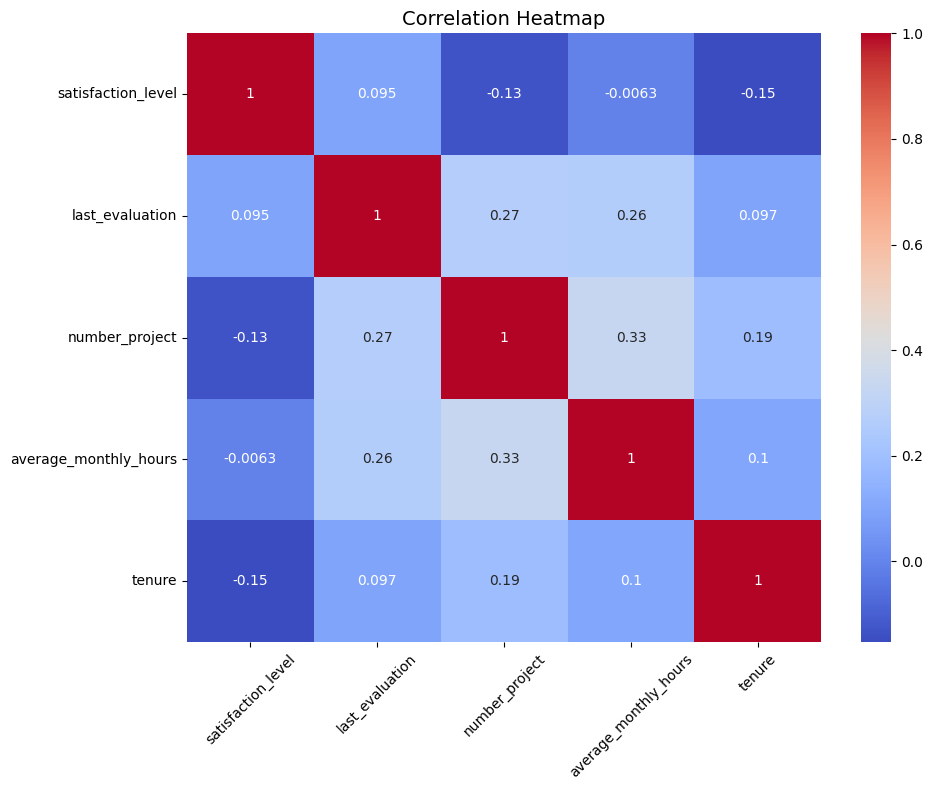

In [33]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
            annot=True, 
            cmap=sns.color_palette("coolwarm", as_cmap=True))

plt.title('Correlation Heatmap', fontdict={'fontsize':14})

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [40]:
df_lr = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)].reset_index(drop=True)

df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.41,0.50,2,153,3,0,1,0,1,False,False,False,False,False,False,True,False,False


In [45]:
y = df_lr['left']
X = df_lr.copy()
X = X.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [46]:
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [47]:
y_pred = log_clf.predict(X_test)

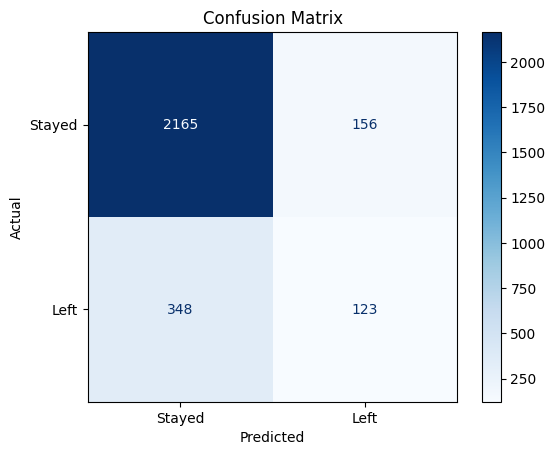

In [52]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=['Stayed', 'Left'])

log_disp.plot(cmap='Blues',
              values_format='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

In [53]:
df_lr['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [54]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



## Tree-based Model

In [55]:
y = df_encoded['left']
X = df_encoded.copy()
X = X.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [70]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[None, 2, 4, 8, 10, 15, 20, 25, 30, 50],
             'min_samples_leaf': [1, 3, 5, 7, 10],
             'min_samples_split': [2, 4, 6, 8, 10]
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

dt_grid = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [71]:
%%time
dt_grid.fit(X_train, y_train)

CPU times: total: 23.5 s
Wall time: 24 s


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [72]:
dt_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [73]:
dt_grid.best_score_

np.float64(0.9698344969964589)

In [74]:
def make_results(model_name, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                   }
    
    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [75]:
dt_cv_results = make_results('decision tree cv', dt_grid, 'auc')
dt_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.915522,0.913602,0.914495,0.971645,0.969834


### Random Forest

In [99]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [2, 3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [100, 200, 300],
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [100]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 15min 42s
Wall time: 15min 54s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 3, ...], 'max_features': [1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [101]:
path = '/HR_Capstone_Project'

In [102]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [103]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [104]:
write_pickle(path, rf_cv, 'rf_cv_1')

In [105]:
rf_cv_1 = read_pickle(path, 'rf_cv_1')

In [106]:
rf_cv_1.best_score_

np.float64(0.9799110660301167)

In [107]:
rf_cv_1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [108]:
rf_cv_1_results = make_results('random forest cv', rf_cv_1, 'auc')

print(dt_cv_results)
print(rf_cv_1_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915522  0.913602  0.914495  0.971645  0.969834
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.946727  0.915614  0.930886  0.977427  0.979911


In [109]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [110]:
rf_cv_1_test_scores = get_scores('random forest 1 test', rf_cv_1, X_test, y_test)
rf_cv_1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest 1 test,0.960084,0.917671,0.938398,0.979987,0.955035


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.